In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
df = pd.read_csv('swiggy.csv')
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [5]:
df.tail()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28
8679,466488,Navrangpura,Ahmedabad,Sassy Street,250.0,2.9,80,"Chaat,Snacks,Chinese",Navrangpura,44


In [6]:
df.isnull().sum() #dataset is clean

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [7]:
sns.set_style("whitegrid")

num_summary = df.describe()
print(num_summary)

                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.000000
50%    283442.000000   300.000000     3.900000      80.000000      53.000000
75%    393425.250000   400.000000     4.200000     100.000000      64.000000
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000


In [8]:
numerical_cols = ['Price', 'Avg ratings', 'Total ratings', 'Delivery time']
for col in numerical_cols:
    print(f"{col} - Mean: {df[col].mean()}, Median: {df[col].median()}, Mode: {df[col].mode()[0]}")

Price - Mean: 348.4444700460829, Median: 300.0, Mode: 300.0
Avg ratings - Mean: 3.655103686635944, Median: 3.9, Mode: 2.9
Total ratings - Mean: 156.6347926267281, Median: 80.0, Mode: 80
Delivery time - Mean: 53.96705069124424, Median: 53.0, Mode: 52


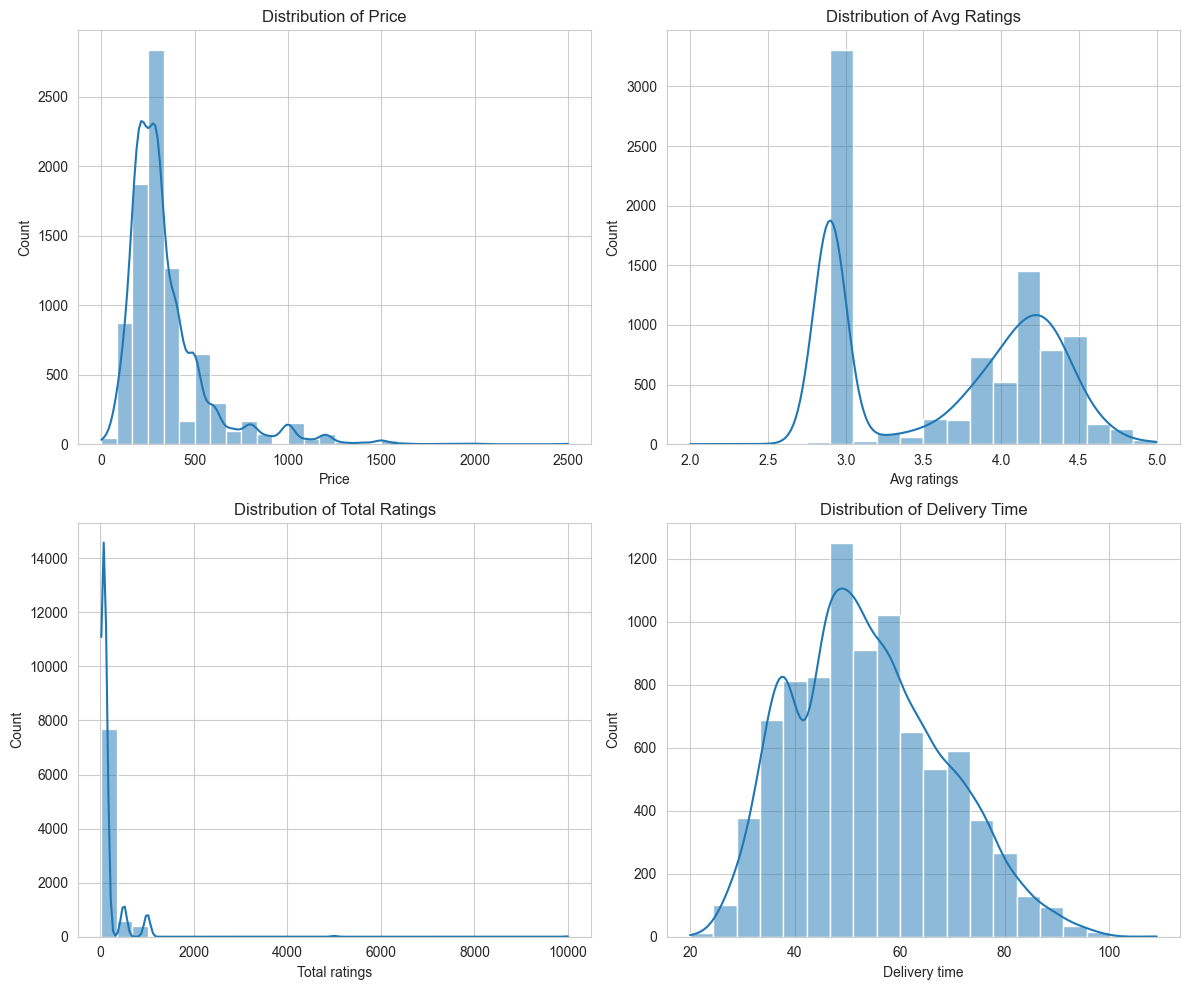

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Price"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Price")
sns.histplot(df["Avg ratings"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Avg Ratings")

sns.histplot(df["Total ratings"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Total Ratings")

sns.histplot(df["Delivery time"], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Delivery Time")

plt.tight_layout()
plt.show()
# Delivery time follows an approximately normal distribution, with most deliveries occurring within a moderate time range.
# Price is right-skewed, indicating that most restaurants follow a similar pricing scheme, with a few outliers charging significantly higher prices.
# Most restuarants receive very few ratings. This indicates customer don't rate the food usually. There is a huge spike at 3 stars. This might be because 3 is the default rating.
# Delivery times also follows a roughly normal distribution. This is characteristic of restaurants that deliver within a fixed radius

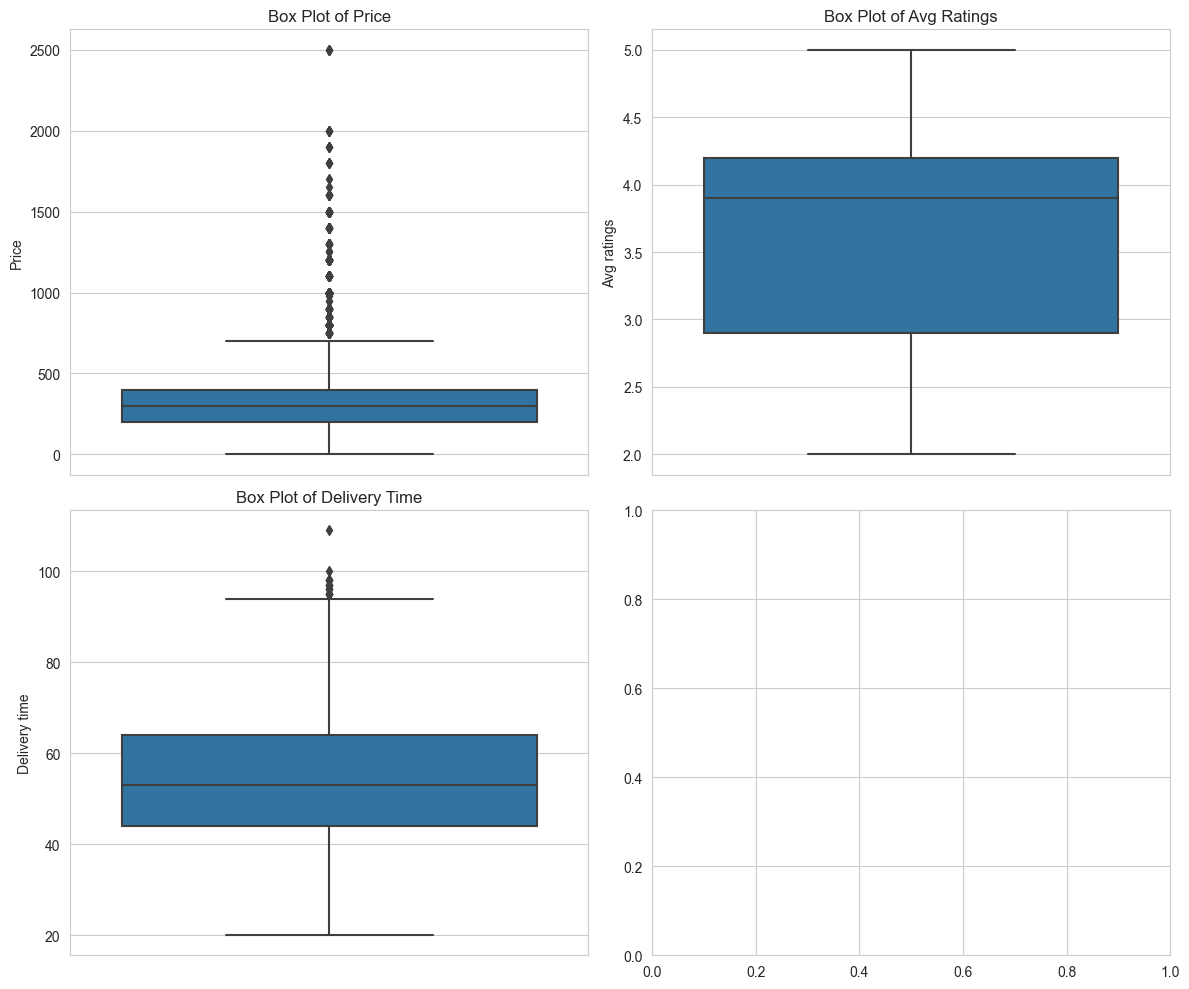

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(y=df["Price"], ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of Price")

sns.boxplot(y=df["Avg ratings"], ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of Avg Ratings")

sns.boxplot(y=df["Delivery time"], ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of Delivery Time")

plt.tight_layout()
plt.show()

# The IQR of Price is low and many outliers exists. However for Ratings, outliers are few. We can also infer that a few restuarants take much longer to deliver food than the majority.

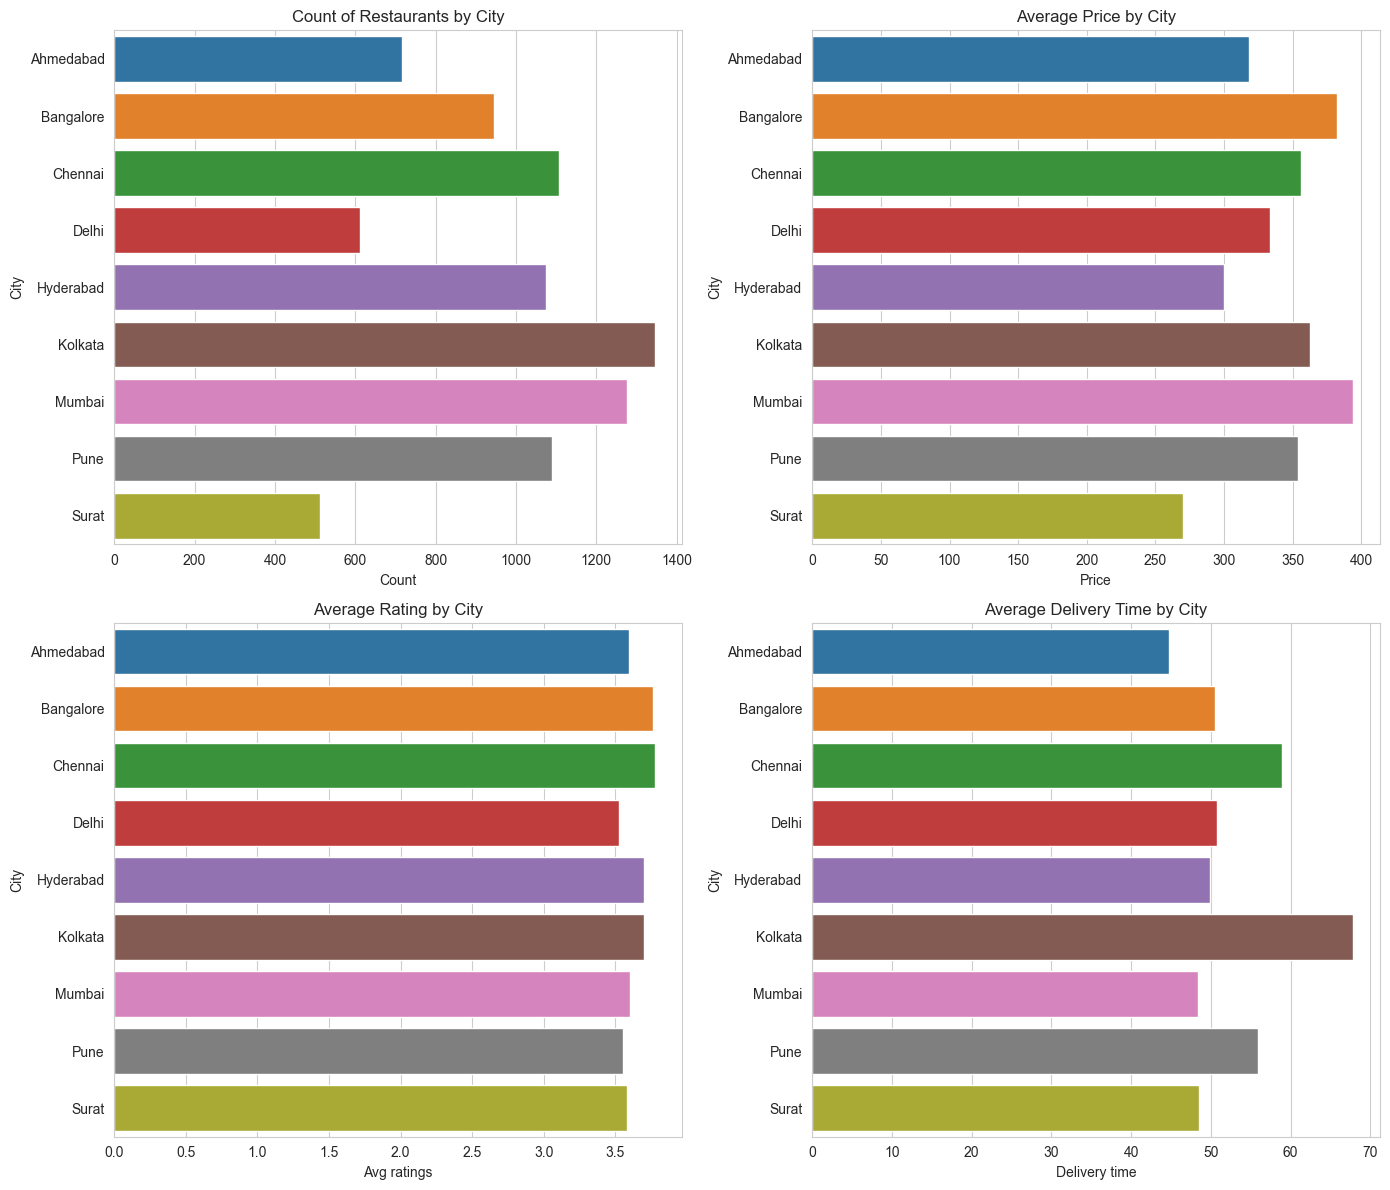

In [16]:
city_group = df.groupby("City").agg({
    "Price": "mean",
    "Avg ratings": "mean",
    "Total ratings": "mean",
    "Delivery time": "mean",
    "City": "count"
}).rename(columns={"City": "Count"}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.barplot(y=city_group["City"], x=city_group["Count"], ax=axes[0, 0])
axes[0, 0].set_title("Count of Restaurants by City")

sns.barplot(y=city_group["City"], x=city_group["Price"], ax=axes[0, 1])
axes[0, 1].set_title("Average Price by City")

sns.barplot(y=city_group["City"], x=city_group["Avg ratings"], ax=axes[1, 0])
axes[1, 0].set_title("Average Rating by City")

sns.barplot(y=city_group["City"], x=city_group["Delivery time"], ax=axes[1, 1])
axes[1, 1].set_title("Average Delivery Time by City")

plt.tight_layout()
plt.show()

# Kolkata has a significantly higher delivery time compared to other cities. The averafe rating is consistent across all cities. Surant is has the cheapest average price.

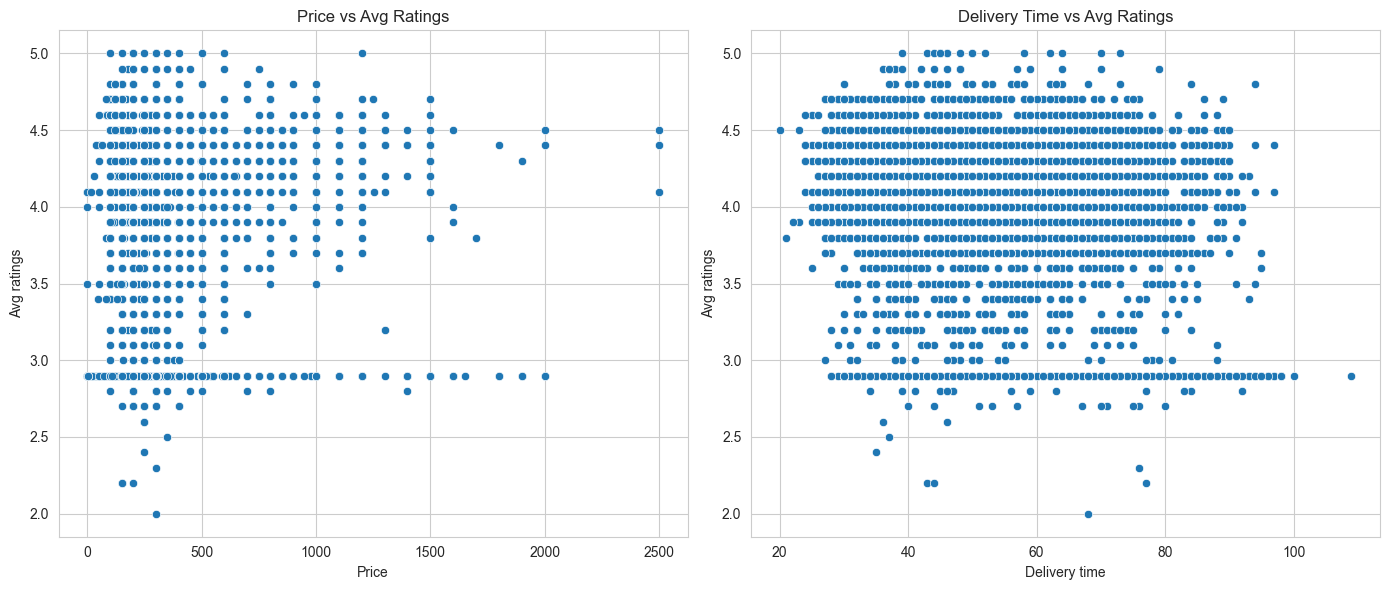

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=df["Price"], y=df["Avg ratings"], ax=axes[0])
axes[0].set_title("Price vs Avg Ratings")

sns.scatterplot(x=df["Delivery time"], y=df["Avg ratings"], ax=axes[1])
axes[1].set_title("Delivery Time vs Avg Ratings")

plt.tight_layout()
plt.show()

# Higher priced restuarants seems to have less lower ratings and also less higher rating. They have less variance whereas lower priced restuarants have a higher variance.
# Extremely long delivery times may lead to lower ratings.

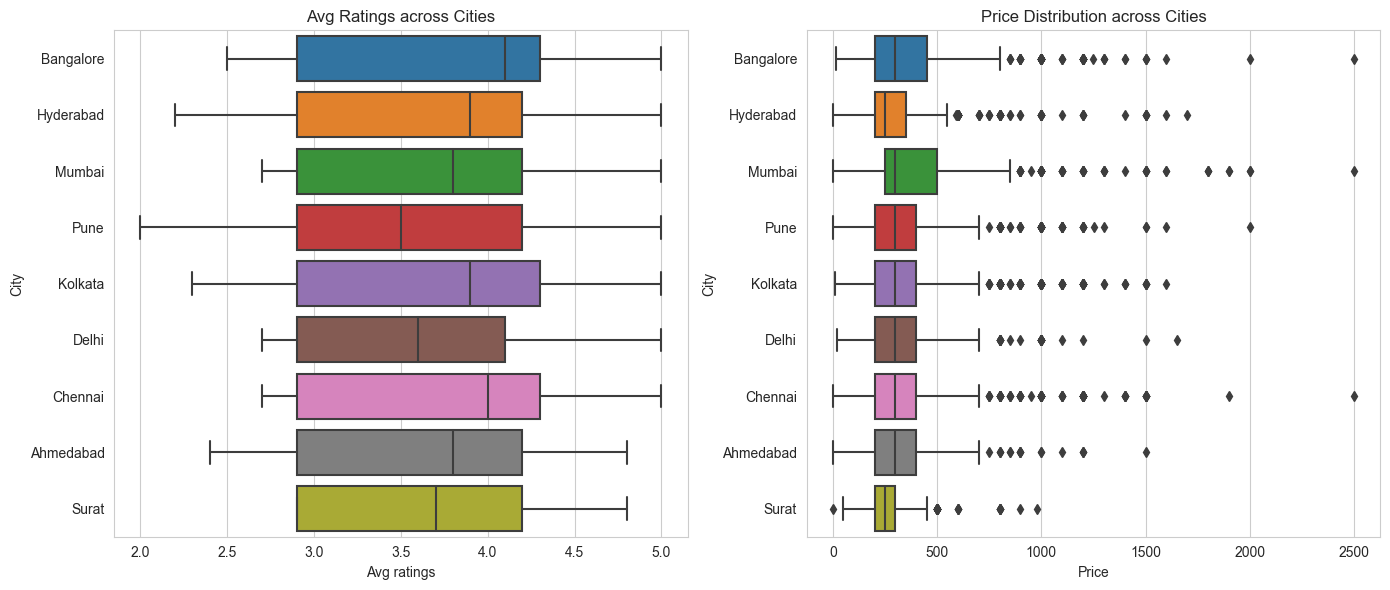

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x=df["Avg ratings"], y=df["City"], ax=axes[0])
axes[0].set_title("Avg Ratings across Cities")

sns.boxplot(x=df["Price"], y=df["City"], ax=axes[1])
axes[1].set_title("Price Distribution across Cities")

plt.tight_layout()
plt.show()

#Some cities have a higher spread of restuarants price wise. Bangalore, Mumbai and Chennai have higher priced restuarants. Ahmedabad and Surat have relatively lower price variability
# Average rating is more or less consistent across cities.


In [19]:
top_rated = df.sort_values(by="Avg ratings", ascending=False).groupby("City").head(3)
print(top_rated[["Restaurant", "City", "Avg ratings"]])


                                  Restaurant       City  Avg ratings
5425                      The Asian Pavilion     Mumbai          5.0
3894                 Diamond Market Pizza Jp     Mumbai          5.0
5800                       The Liege Waffles  Hyderabad          5.0
8439                  Keventers Ice Creamery    Kolkata          5.0
5799    Splurge - Thickshakes And Milkshakes  Hyderabad          5.0
5519                             Cafe Kokomo     Mumbai          5.0
6538                 Shree Krishna Juice Bar       Pune          5.0
8011                          Creams & Bites  Bangalore          5.0
5798                     Wallonia Waffle Co.  Hyderabad          5.0
5684                               Papacream       Pune          5.0
6297                               Fat Tiger      Delhi          5.0
5936                           Tricky Shakes  Bangalore          5.0
6390                            Nasi And Mee    Chennai          5.0
8571                              

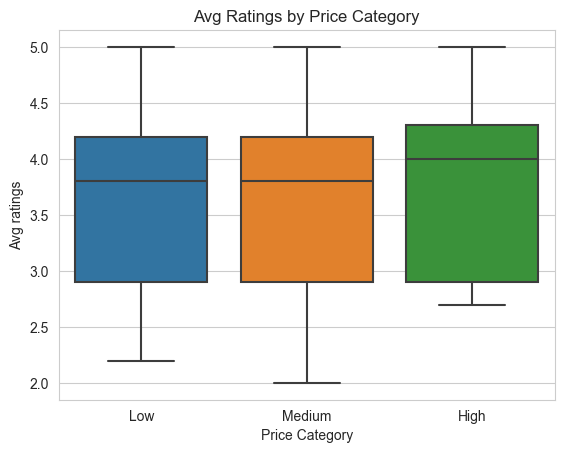

In [20]:
df["Price Category"] = pd.qcut(df["Price"], q=3, labels=["Low", "Medium", "High"])
sns.boxplot(x=df["Price Category"], y=df["Avg ratings"])
plt.title("Avg Ratings by Price Category")
plt.show()


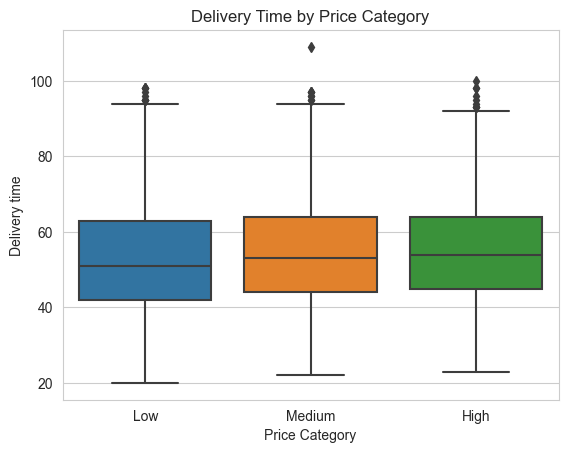

In [21]:
sns.boxplot(x=df["Price Category"], y=df["Delivery time"])
plt.title("Delivery Time by Price Category")
plt.show()


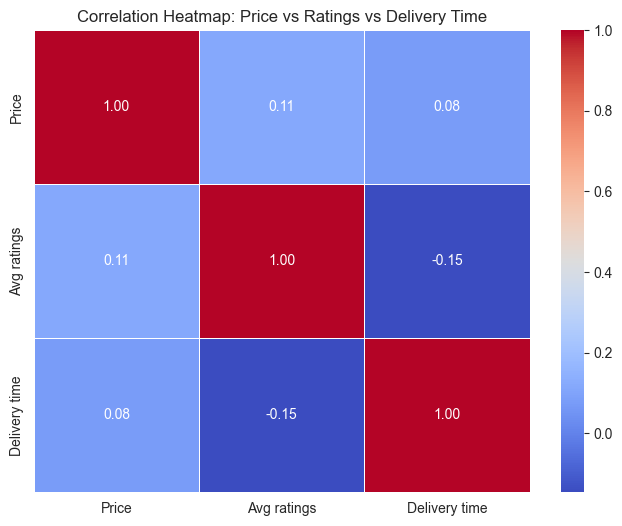

In [59]:
data = df[['Price', 'Avg ratings', 'Delivery time']]

corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Price vs Ratings vs Delivery Time")
plt.show()

# There exists a weak positive correlation between Price and rating. Higher price restuarants are slightly more likely to have higher ratings. A weak negative correlation exists between
# avg rating and delivery time i.e higher delivery time leads to lower rating

In [44]:
def count_restaurants_by_food_type(df, food_type):
    return df[df["Food type"].str.contains(food_type, case=False, na=False)].groupby("City")["Restaurant"].count()

food_types = ["North Indian", "Chinese", "Fast Food", "Snacks", "Pizzas", "American", "Continental", "Biryani", "Italian"]
food_type_counts = pd.DataFrame()

for food in food_types:
    food_type_counts[food] = count_restaurants_by_food_type(df, food)
print(food_type_counts)

           North Indian  Chinese  Fast Food  Snacks  Pizzas  American  \
City                                                                    
Ahmedabad           154      180        184     110      90        24   
Bangalore           265      253        162     122      66        55   
Chennai             218      313        155     149      64        40   
Delhi               215      224        126     106      41        24   
Hyderabad           222      308        168     133      79        33   
Kolkata             240      541        233     188      65        47   
Mumbai              298      504        232     154      93        58   
Pune                334      336        276     114      69        52   
Surat               131      157        158      68      64        13   

           Continental  Biryani  Italian  
City                                      
Ahmedabad           72       49       52  
Bangalore          101      144       79  
Chennai            105  

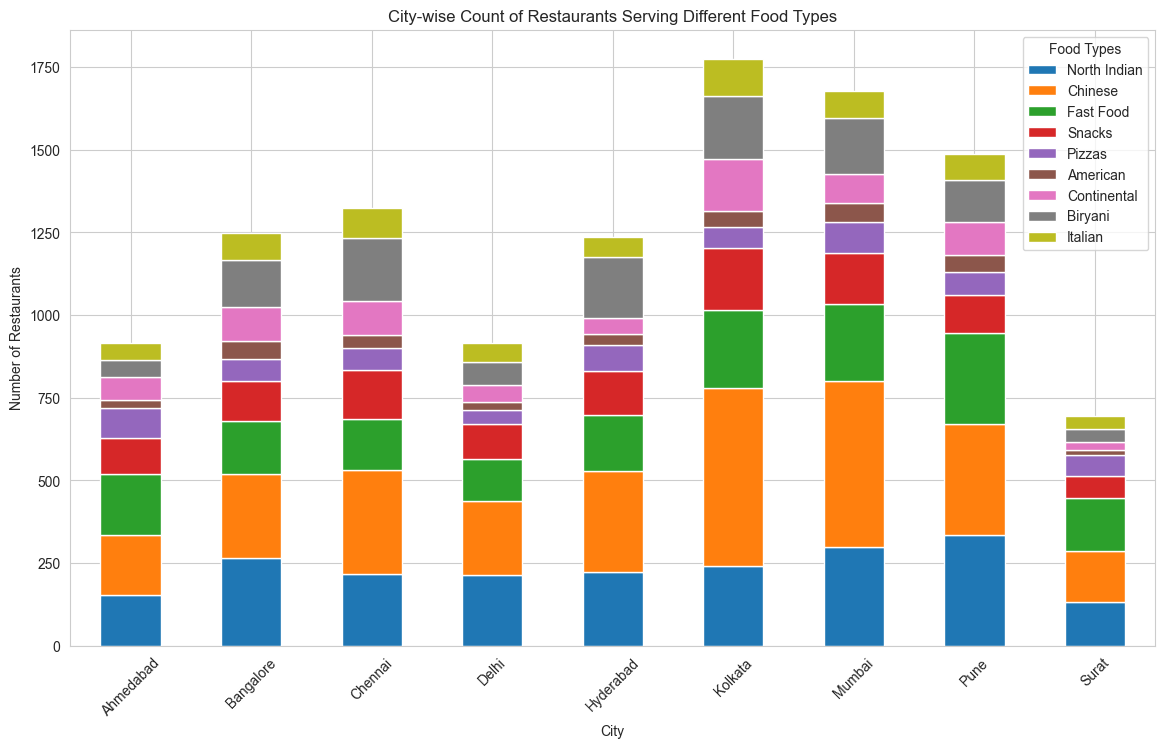

In [45]:
for food in food_types:
    food_type_counts[food] = count_restaurants_by_food_type(df, food)

food_type_counts.plot(kind="bar", figsize=(14, 8), stacked=True)
plt.title("City-wise Count of Restaurants Serving Different Food Types")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.legend(title="Food Types")
plt.xticks(rotation=45)
plt.show()

# North indian and Chinese cuisine is abundant. Fast food is also a leading category

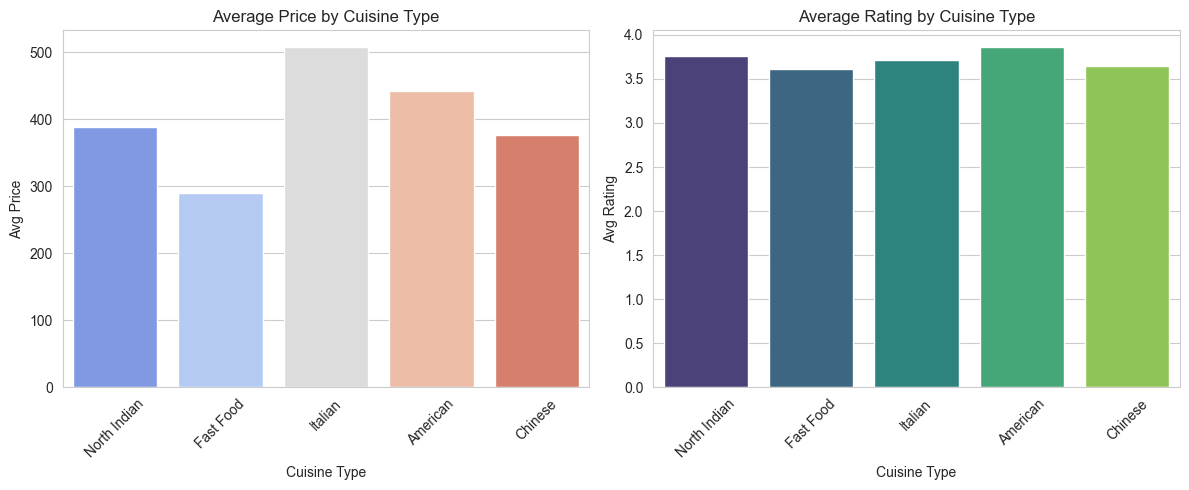

In [63]:
selected_cuisines = ['North Indian', 'Fast Food', 'Italian', 'American', 'Chinese']
cuisine_stats = {}

for cuisine in selected_cuisines:
    filtered_df = df[df['Food type'].str.contains(cuisine, case=False, na=False)]
    avg_price = filtered_df['Price'].mean()
    avg_rating = filtered_df['Avg ratings'].mean()
    cuisine_stats[cuisine] = {'Avg Price': avg_price, 'Avg Rating': avg_rating}

cuisine_df = pd.DataFrame(cuisine_stats).T

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=cuisine_df.index, y=cuisine_df['Avg Price'], ax=axes[0], palette="coolwarm")
axes[0].set_title("Average Price by Cuisine Type")
axes[0].set_ylabel("Avg Price")
axes[0].set_xlabel("Cuisine Type")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=cuisine_df.index, y=cuisine_df['Avg Rating'], ax=axes[1], palette="viridis")
axes[1].set_title("Average Rating by Cuisine Type")
axes[1].set_ylabel("Avg Rating")
axes[1].set_xlabel("Cuisine Type")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
# Fast food is cheapest, Italian is most expensive on average. Ratings are fairly consistent hence we may conclude that people are willing to pay more for italian food without affecting rating.

In [34]:
area= df['Area'].value_counts().head(20)
area
# Maximum restuarants are in Rohini

Area
Rohini            257
Chembur           208
Kothrud           149
Andheri East      135
Navrangpura       132
Indiranagar       130
Kurla             129
Koramangala       124
Bidhannagar       123
Ashok Nagar       118
Banjara Hills     113
Santacruz East    110
Athwa              99
Vastrapur          94
Himayath Nagar     92
Powai              91
Perambur           89
Shivaji Nagar      75
Adajan             74
Marol Sakinaka     74
Name: count, dtype: int64

In [47]:
target_areas = ["Rohini", "Chembur", "Kothrud", "Andheri East", "Navrangpura", "Indiranagar"]

df_filtered = df[df['Area'].isin(target_areas)]

summary_stats = df_filtered.groupby("Area").agg({
    "Price": ["mean", "median", "min", "max"],
    "Delivery time": ["mean", "median", "min", "max"],
    "Avg ratings": ["mean", "median", "min", "max"]
}).round(2)

summary_stats.columns = ["_".join(col).strip() for col in summary_stats.columns]
summary_stats.reset_index(inplace=True)

print(summary_stats)

           Area  Price_mean  Price_median  Price_min  Price_max  \
0  Andheri East      374.61         350.0       99.0     1000.0   
1       Chembur      378.99         300.0        1.0     1500.0   
2   Indiranagar      415.59         300.0      100.0     1300.0   
3       Kothrud      321.20         300.0      100.0     1600.0   
4   Navrangpura      311.86         300.0        5.0      900.0   
5        Rohini      303.39         300.0      100.0     1000.0   

   Delivery time_mean  Delivery time_median  Delivery time_min  \
0               54.66                  54.0                 40   
1               49.88                  49.0                 35   
2               57.15                  57.0                 40   
3               58.17                  58.0                 40   
4               38.83                  38.0                 27   
5               44.61                  45.0                 25   

   Delivery time_max  Avg ratings_mean  Avg ratings_median  Avg rat

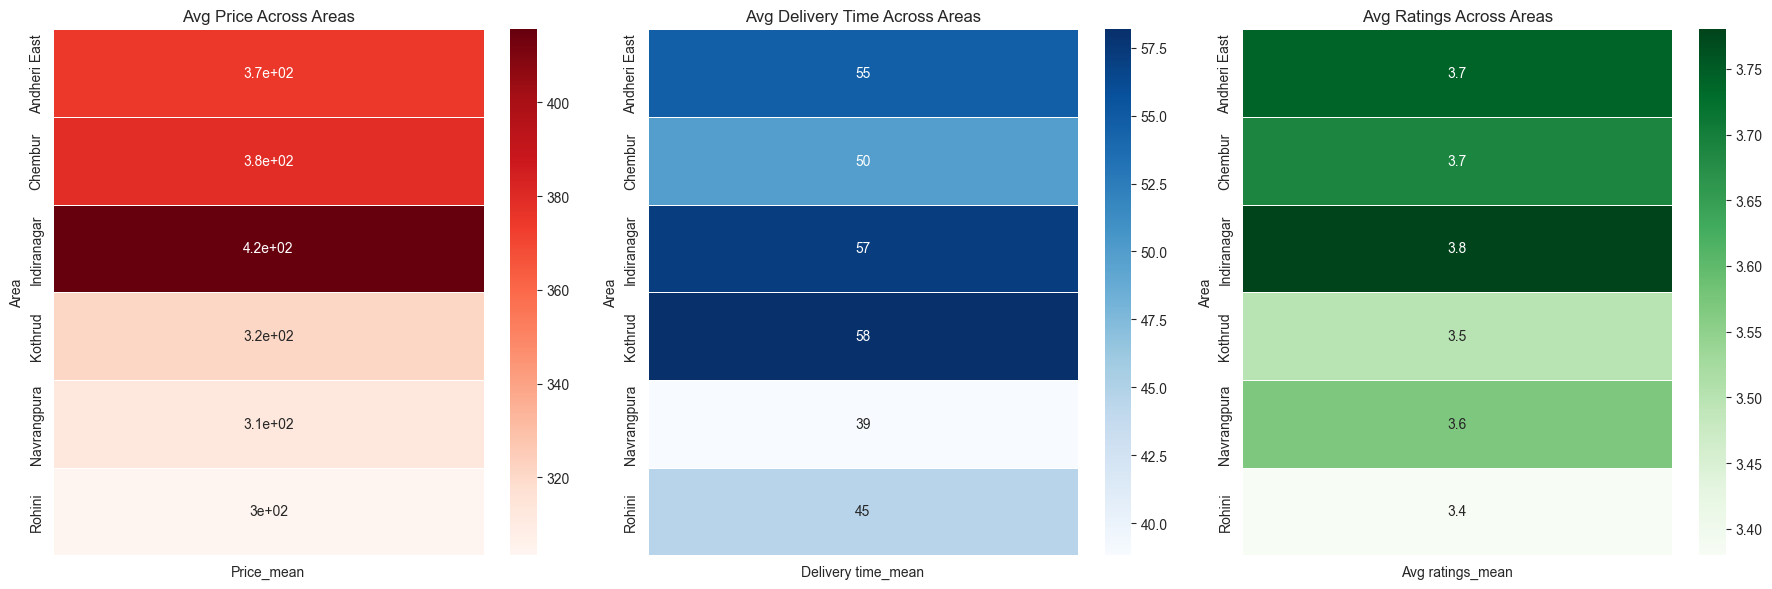

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(summary_stats.set_index("Area")[["Price_mean"]], 
            annot=True, cmap="Reds", linewidths=0.5, ax=axes[0])
axes[0].set_title("Avg Price Across Areas")

sns.heatmap(summary_stats.set_index("Area")[["Delivery time_mean"]], 
            annot=True, cmap="Blues", linewidths=0.5, ax=axes[1])
axes[1].set_title("Avg Delivery Time Across Areas")

sns.heatmap(summary_stats.set_index("Area")[["Avg ratings_mean"]], 
            annot=True, cmap="Greens", linewidths=0.5, ax=axes[2])
axes[2].set_title("Avg Ratings Across Areas")

plt.tight_layout()
plt.show()

# Indiranager has extremely expensive Avg Price and one of the highest delivery time and average rating.


In [57]:
summary_stats = df.groupby("Area").agg({
    "Price": "mean",
    "Delivery time": "mean"
}).round(2)

highest_price_area = summary_stats["Price"].idxmax()
highest_price_value = summary_stats["Price"].max()

highest_delivery_area = summary_stats["Delivery time"].idxmax()
highest_delivery_value = summary_stats["Delivery time"].max()

print(f"Area with Highest Price: {highest_price_area} (₹{highest_price_value})")
print(f"Area with Most Delivery Time: {highest_delivery_area} ({highest_delivery_value} min)")

Area with Highest Price: Vile Parle (₹1500.0)
Area with Most Delivery Time: Rabindrapally (97.0 min)


# Summary
- From this EDA, we can see a lot of patterns emerge about restuarants. A positive correlation between price and rating and a negative correlation between delivery time and rating can be seen.
- We can also conclude that people are willing to pay more for italian food whereas fast food is the cheapest.
- We can also see that North Indian and Chinese cuisines are most popular in these cities. Bigger cities have a greater variation in terms of pricing and cuisines whereas cities like Ahmedabad and Surat have lesser variation.
- Average delivery time is similar to a normal distribution which indicates that restuarants deliver most frequently in areas nearby and less frequently to areas far away.
- Most restuarants price themselves below 1000 range
- We can also see that Indirinagar is a prime location to open a higher priced restuarant.
- Most users don't rate the restuarant and many give it 3 stars rating (Perhaps it is the default option)